In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from matplotlib import rc
import pandas as pd 
import urllib.request
import numpy as np

In [3]:
import platform

In [5]:
import sys

 

print(sys.version)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [2]:
AA = pd.read_csv("./dAAb.csv")

In [3]:
print(AA)

                                                   tweet  label1  label2  \
0                                아 씨발 개처웃음 존나 웃김 캐해 레전드다     0.0     0.0   
1                                     갤러리 보다가 갑자기 보고 개웃음     0.0     0.0   
2                          바밍 라이브 너무 신남 한국에서 라이브 좀 자주 해라     1.0     0.0   
3                                    그대는 늘 행복의 한복판에 있길       1.0     0.0   
4      인문학을 한다는 자부심 연구하고 싶은 주제에 매달리는 기쁨 등이 내 삶의 추진력이다...     1.0     0.0   
...                                                  ...     ...     ...   
89807  조선 시조의 나라 희망은 점점 사라져가네  조선 시조의 나라 행복을 잊어버린 아픔의 세상     2.0     0.0   
89808  ㅋ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ  괜차나요 저도 보고 진짜 소리질럿어요 아악 어케 어케...     0.0     0.0   
89809                     월요일 잘 버티고 있어요 나는 지금 너무 탈출하고싶은데     0.0     0.0   
89810                              스포츠토토 유연석 녀구함땅부자 행복       1.0     0.0   
89811                           왜 미묘해요 ㅋ큐 ㅁㅈㅁㅈ 기쁨을 즐기시라굿     1.0     0.0   

       label3  new_label1  new_label2  new_label3  
0         1.0         2.0         0

In [10]:
print(AA['new_label1'][0])

2.0


In [22]:
AA1 = []
AA2 = []
AA3 = []
AA4 = []
for i in range(len(AA)):
    if AA['new_label1'][i] == AA['new_label2'][i] == AA['new_label3'][i]:
        AA4.append([AA['tweet'][i],0])
    elif AA['new_label1'][i] > AA['new_label2'][i] + AA['new_label3'][i]:
        AA1.append([AA['tweet'][i],1])
    elif AA['new_label2'][i] > AA['new_label1'][i] + AA['new_label3'][i]:
        AA2.append([AA['tweet'][i],2])
    elif AA['new_label3'][i] > AA['new_label1'][i] + AA['new_label2'][i]:
        AA3.append([AA['tweet'][i],3])

In [23]:
print(AA2[50:100])

[['모두의 익명 질문을 모집 중  최근 답변한 질문  롤리엄마 오늘 웑챤 셀카 떴  롤리님 수박 자르는 차니 참  롤리님 진짜 ㅠㅠㅠㅠㅠㅠㅠㅠ  저것도 행복으로 칠거같아서 질문상자 익명질문모집중   ', 2], ['창기 적시타 너무 기쁨 ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ', 2], ['아하 아이고 아이고 그렇군요 못 이룬 걸 남겨놓고 은퇴해버려서 어떡해 우리 라니ㅠㅠㅠㅠㅠㅠ 한이 많겠군요 모쪼록 즐겁게 읽어주셨다면 저의 기쁨입니다 후후', 2], ['솔직히 란 에픽이라고 해서 청 아라 중심일거 같다고 생각햇는데 생각보다 다들 착즙할것들 나와서 즐거움 프뤼나움보다도 더 많은듯 맛있다', 2], ['소정환 누나랑 싸우다가 누나가 이 집에서 니 물건 다 챙겨서 나가 소리지르면 아무말 없이 쳐다보다가 냅다 누나 들쳐업고 현관문열것 같은 남자 위 누나 이게 뭔 상황인가 싶어서 정신못차리다가 야 너 뭐해ㅋㅋㅋ 함서 웃음터지면 약간 머쓱한듯 웃으니까 좋잖아요 말 끝 흐릴 것 같음', 2], ['윤호 ㅜㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ윤호 보는게 젤루 행복행    ', 2], ['내일 마감이니까 설마 그 시가 내일 오후 시', 2], ['진짜 그러면 조켓내요 ', 2], ['어제 신나서 친구집에서 자는바람에 결국 오늘 일 하나도 못했네 그래도 큰건하나 들어와서 신남', 2], ['백현아오늘은   백현이야 오늘은 일기말고 다른 얘기 그게 뭐냐면 나 휴학 안 하고 쭉 학교 다닌 게 잘한 거 같아 너 전역이랑 나 졸업이랑 일도 차이 안나 진짜 나한테는 최고의 졸업선물이야 다른 선물 다 필요 없어 빨리 월 와서 너랑 같이 행복만 하고 싶다요 애기 너무 보고시펑', 2], ['그말씀해주신분말로는 브왁했다네요', 2], ['아놔 저도 커미션 첨이라 어느 정도로 요청해야하는지 감잡기 어려웟내요ㅠㅠㅠㅠㅠㅠ 하지만 조살깅도 장동쿤도 그걸 지켜보는 지살이도 행복햇으면 됏지 않을까요 뭐라는', 2], ['백현아오늘은 으아 오늘 진짜 너무 덥다 친한 언니 생일이라 오랜만에 만났는데 너무 더워서 어딜 돌아다니지를 못하겠더

In [28]:
APA0 = pd.DataFrame(AA1,columns=['tweet','label'])
APA1 = pd.DataFrame(AA2,columns=['tweet','label'])
APA2 = pd.DataFrame(AA3,columns=['tweet','label'])
APA3 = pd.DataFrame(AA4,columns=['tweet','label'])
APA = pd.concat([APA0,APA1,APA2,APA3])

In [29]:
print(APA)

                                                  tweet  label
0                               아 씨발 개처웃음 존나 웃김 캐해 레전드다      1
1                                    갤러리 보다가 갑자기 보고 개웃음      1
2                         바밍 라이브 너무 신남 한국에서 라이브 좀 자주 해라      1
3                                   그대는 늘 행복의 한복판에 있길        1
4     인문학을 한다는 자부심 연구하고 싶은 주제에 매달리는 기쁨 등이 내 삶의 추진력이다...      1
...                                                 ...    ...
6440           해쉬태그 다시 보니 최애캐였네 자캐그려줄가 생각했더니만 뭐 아무래도 좋아      0
6441                                        다덜 어디 저는         0
6442                               맛난드림무한제공사건이 일어난 집입닏다      0
6443                 하 근데 진짜 나만은 가질 수 없었던  이게 너무 너무해요        0
6444                                    이렇게 웃는거 쫌반칙인듰        0

[85797 rows x 2 columns]


In [30]:
APA.to_csv('./APA.csv', index=False, encoding="utf-8-sig")

In [31]:
BB = pd.read_csv("./dBBb.csv")

In [33]:
BB1 = []
BB2 = []
BB3 = []
BB4 = []
for i in range(len(BB)):
    if BB['new_label1'][i] == BB['new_label2'][i] == BB['new_label3'][i]:
        BB4.append([BB['tweet'][i],0])
    elif BB['new_label1'][i] > BB['new_label2'][i] + BB['new_label3'][i]:
        BB1.append([BB['tweet'][i],1])
    elif BB['new_label2'][i] > BB['new_label1'][i] + BB['new_label3'][i]:
        BB2.append([BB['tweet'][i],2])
    elif BB['new_label3'][i] > BB['new_label1'][i] + BB['new_label2'][i]:
        BB3.append([BB['tweet'][i],3])

In [34]:
print(BB2[50:100])

[['네가 죽는 걸 무력하게 지켜만 보는 건 얼마나 무서울까 네가 조금만 다쳐도 마음이 아픈데 그런 생각을 하며 작은 손을 들어올려 손톱 끝에 입을 맞췄다 네 상처에 입을 맞추는 기분으로', 2], ['하 친애도 친애작이라는 단어를 모를때로 돌아갈수가없음 많은 오타쿠 언어생활을 여기 위탁하고있음', 2], ['현생ㅇ땜에 애들이랑 재밋는거할기회 다놓친거갓아서 넘슬픔    히발나랑놀아줘어어어어어', 2], ['그건 그렇고 그 때나 이제나 나는 억억대며 울지 못한다 사실이 나를 수치스럽게 한다 잠이 든 두 시간 결국 아무 일도 일어나지 않았다는 사실 악몽을 꿨다는 간편한 말로 끝나버릴 사실 그 때 그것들이 내 삶을 뛰어넘어 나만 지독하게 붙들거라는 사실 이건 나를 위해서만 있는 지옥이다', 2], ['챙겨줄때가 고마운줄 알아 챙겨주고싶어도 이젠 못챙겨주는 애도 있다구  넌 어디가지마 알았지', 2], ['진쯔난 나퐁상 애완동묾못울지도  강이지티우고싶다', 2], ['여운을 남기는 것들 참 다층적이고 미묘해서 좋음이 명쾌하게 설명되지 않아 글로 정확히 표현하기 어려울 때 혹은 적어낸 그것이 다가 아니라고 느껴질 때 어쩌면 좀 더 오래가는 그런 것', 2], ['기분이 이상해 난 정말 괜찮을 줄 알았는데 알잖아 나 비비야 내 인생에 슬픔과 불행 따위는 없어 그러니까 난 괜찮아 그런데 왜 이렇게 기분이 이상할까', 2], ['또말하지만 저 꿈희망절망지침불행슬픔의 세계에서 단하나의 이상을 발굴하고 그걸 이유로 끈질기게 살아남아야만 하는 두 사람의 스토리가 진심쌈디처럼눈물흘리면서읽게됨근데진짜아름답다이게진짜 정말 읽으면서도 대체이게 어떤 엔딩이 되는걸까 하면서 읽었는데 정말   ', 2], ['울지말고말해봐일단 님기준 개쩔었단건 알겠어', 2], ['저리 말하며 앞서 걷는 훈  그리고 그 작은 등을 바라보던 순  눈가를 꾹꾹 누르던 손을 잡고 싶어 혹시라도 물가가 있을까 온기는 남아 있을까 아름다운 가락과 필담을 빗어내는 저 손은 누군가 잡지 않아도 괜찮을까 진짜 바보야 지금

In [35]:
BPB0 = pd.DataFrame(BB1,columns=['tweet','label'])
BPB1 = pd.DataFrame(BB2,columns=['tweet','label'])
BPB2 = pd.DataFrame(BB3,columns=['tweet','label'])
BPB3 = pd.DataFrame(BB4,columns=['tweet','label'])
BPB = pd.concat([BPB0,BPB1,BPB2,BPB3])

In [36]:
BPB.to_csv('./BPB.csv', index=False, encoding="utf-8-sig")

In [37]:
CC = pd.read_csv("./dCCb.csv")

In [38]:
CC1 = []
CC2 = []
CC3 = []
CC4 = []
for i in range(len(CC)):
    if CC['new_label1'][i] == CC['new_label2'][i] == CC['new_label3'][i]:
        CC4.append([CC['tweet'][i],0])
    elif CC['new_label1'][i] > CC['new_label2'][i] + CC['new_label3'][i]:
        CC1.append([CC['tweet'][i],1])
    elif CC['new_label2'][i] > CC['new_label1'][i] + CC['new_label3'][i]:
        CC2.append([CC['tweet'][i],2])
    elif CC['new_label3'][i] > CC['new_label1'][i] + CC['new_label2'][i]:
        CC3.append([CC['tweet'][i],3])

In [39]:
print(CC2[50:100])

[['역할바꾸기 엄마쪽 쳐다도 안보고 못하겠다고 하는 것도 유난히 오늘 더 버림받았다는 외로움이랑 배신감이 잘 보여서 너무 좋아ㅠㅠㅠㅠ 이젠 아예 분노하는 작유가 돼버린게 너무 좋다 근데 분노하면서 엄마를 갈구하는 유진이', 2], ['만약에 제가 나중에 커서 자취하면 정리는 제대로 할 거에요 난 미니멀리스트인데 여기는 큰손가족이거든 정리되지 않은 선반과 책상에 분노', 2], ['나 진짜 라이브 보면서 화가 치밀어 올라가지고 ㅠㅠㅠ 아직도 분노를 삭히지 못했어 지금 하니 아직 회복중인데ㅠㅠㅠㅠ 생각 한번만 더 해보고 애들 배려해주지 나 너무 속상하고 미안해ㅠㅠㅠ', 2], ['생리를 안 하는 것 같을 수가 잇나 생리통이 생리대 영향 잇긴 하겟지만 천생리대를 써도 생리통 때문에 기절해서 조퇴 당하는데', 2], ['배준혁 고르면 나머지 명 없애주지 않을까  ㅁㅊ거아님', 2], ['아무도 관심을 주지 않았다 설마 나 진짜 꿈속에서 봄꽃 본 거야 분명 분명 새봄이가 그런 대사를 쳤다구요', 2], ['키스로 두려움은 전파되지 않았다 모든 게 물리적인 감각으로써 정돈된다 우린 분노나 공포를 나눠 가진 애들이 아니라 그냥 그냥 아까 전보다는 번들거리는 입술을 가진 여자애들이 된다 내가 마저 묻는다 어땠어 첫 키스', 2], ['레드팀애들은 어딘가 훅 직진하는면이 잇으면좋겟고 블루팀애들은 좀더 진중하고 신중한 면이 잇으면 좋겟어 근데 둘다 엇비슷하긴할듯 그냥 같은 상황일때 레드팀은 밀어붙이고 블루팀은 한번 더 생각해보고 그런차이 일거같다는 생각중 그러니까 그거인거지 뜨거운 분노와 차가운 분노넹', 2], ['이 이럴수가 질투하고시기하고분노하고ㅠㅠㅜㅜㅜㅜㅠㅠㅠㅜㅜㅜㅜㅜㅜㅠㅠㅠㅠㅜㅜㅜㅜㅜㅜㅠㅠㅜㅜㅜㅠㅠㅠㅜㅜㅜㅠㅠ 보고싶어요 레이디들 ㅠㅠㅠㅠㅠㅠㅜㅠ', 2], ['상혁그거알아 통계적으로 세명중 한명은 고자래 석도난 아닌데 상혁나도 아닌데  이체뭐시팔 왜 날봐', 2], ['비와사 안사려고햇는데 엄마가 롯데월드에 이만칠천원내고 입장해서 공기만 마시다올거냐고해서 할말없어서 결

In [40]:
CPC0 = pd.DataFrame(CC1,columns=['tweet','label'])
CPC1 = pd.DataFrame(CC2,columns=['tweet','label'])
CPC2 = pd.DataFrame(CC3,columns=['tweet','label'])
CPC3 = pd.DataFrame(CC4,columns=['tweet','label'])
CPC = pd.concat([CPC0,CPC1,CPC2,CPC3])

In [41]:
CPC.to_csv('./CPC.csv', index=False, encoding="utf-8-sig")

In [42]:
DD = pd.read_csv("./dDDb.csv")

In [43]:
DD1 = []
DD2 = []
DD3 = []
DD4 = []
for i in range(len(DD)):
    if DD['new_label1'][i] == DD['new_label2'][i] == DD['new_label3'][i]:
        DD4.append([DD['tweet'][i],0])
    elif DD['new_label1'][i] > DD['new_label2'][i] + DD['new_label3'][i]:
        DD1.append([DD['tweet'][i],1])
    elif DD['new_label2'][i] > DD['new_label1'][i] + DD['new_label3'][i]:
        DD2.append([DD['tweet'][i],2])
    elif DD['new_label3'][i] > DD['new_label1'][i] + DD['new_label2'][i]:
        DD3.append([DD['tweet'][i],3])

In [44]:
print(DD2[50:100])

[['트루즈 솜 미니니 백참 양도해요 일괄   밖에 두어번 정도 들고 나갔다 왔어요 많이 더럽진 않은데 예민하신 분은 구매하지 말아주세요ㅠㅠ   트루즈 트레저 인형  양도 판매 시세 교환  ', 2], ['조 조심해 그러다 머리 박아   위태롭게 걷는 그녀를 보고는 답지않게 먼저 나서서 말을 걸게 되었다 저보다 어린 사람들과는 그나마 대화하는게 편하니 무의식적으로 나온 행동이었을 것 이다  너 얼른 잠깨 잠은 기숙사에 가서 자는게 좋을걸 밖은 소란스럽고 더럽고 위험하니까', 2], ['민물 생선을 요리할때 보통 비늘을 벗기게 되는데 칼로 긁어내면 비늘이 튀어 조리대와 부엌바닥을 더럽히기 쉽다 이럴때는 칼대신 스푼이나 쓰다 남은 무로 비늘을 긁어내면 된다무를 이용할때는 무을 어슷하게 썰어 그 뾰족한 부분으로 비늘을 벗긴다', 2], ['공항라이브 봤는데 내가 다 스트레스받네 저길 가서 저따위로 들러붙어갖고 대체 몇초나 본다고 그 짧은 길도 맘편하게 출국 못하게 하는거임 작작해 제발좀 걍 징그럽단 생각밖에 안듦', 2], ['원래 없는데 작년부터 생리때만 엄청 심하게 생긴 빈혈 때문에 어지럽고 구역질나지만 스트레스를 다스리려고 에그타르트 재료 남은거 마저 굽다가 오븐에 넣는데 타르트 필이 널아놨던 속옷에 쏟아져서 커스터드 크림 팬티가 완성됐는데 뛰쳐나가서 살인을 저지르지 않은 나표창장 받아야되지 않나', 2], ['모두의 익명 질문을 모집 중  최근 답변한 질문  근무시간  어때   네 꿈을 펼쳐라 네꿈을펼  퀸덤 보고싶다   뭐가흉측해 질문상자 익명질문모집중   ', 2], ['왜 징그럽다는 말이 싫어 근데 맞잖냐 왕유치 그래 내가 좀 그런 편이야 애들이랑 있다 보니까 더 유치해진 것도 있겠다만 쩝  아 왜 나랑 친구 안 하는데 납득하는 듯하더니 갑자기 열이 솟아올랐다 냅다 소리를 지른다 셀 수 없지 재해 전에 알던 사람은 전부 죽었어', 2], ['그리고 이 동네는 라티노가 대박 대박 대박 많다흑인도 많다나는 패싸움도 한번 목격했다더 구경하고 싶었는데 불똥 튈

In [45]:
DPD0 = pd.DataFrame(DD1,columns=['tweet','label'])
DPD1 = pd.DataFrame(DD2,columns=['tweet','label'])
DPD2 = pd.DataFrame(DD3,columns=['tweet','label'])
DPD3 = pd.DataFrame(DD4,columns=['tweet','label'])
DPD = pd.concat([DPD0,DPD1,DPD2,DPD3])

In [46]:
DPD.to_csv('./DPD.csv', index=False, encoding="utf-8-sig")

In [47]:
KRdata = pd.concat([APA,BPB,CPC,DPD])

In [48]:
KRdata.to_csv('./KRdata.csv', index=False, encoding="utf-8-sig")

In [49]:
print(KRdata)

                                                 tweet  label
0                              아 씨발 개처웃음 존나 웃김 캐해 레전드다      1
1                                   갤러리 보다가 갑자기 보고 개웃음      1
2                        바밍 라이브 너무 신남 한국에서 라이브 좀 자주 해라      1
3                                  그대는 늘 행복의 한복판에 있길        1
4    인문학을 한다는 자부심 연구하고 싶은 주제에 매달리는 기쁨 등이 내 삶의 추진력이다...      1
..                                                 ...    ...
907              내일만 일하면 꿀같은 휴가다 시간 더럽게 안 간다 오전이 하루 같음      0
908  나 최근에 진짜 존나게 구역질 나왔던 경험  구글에 산삼 검색할 일 있어서 산삼 구...      0
909  저러다 결국 서로서로 죽고 죽이면서 강호가 망해가길 바라고 있습죠ㅠㅠㅋㅋㅋㅋ 정파의...      0
910  내자리만 엉망진창 존나더럽내 그치만 다 필요한것들이라 정리할려면 며칠은 걸리고 파ㅡ...      0
911  불꽃처럼 타오르는 청춘  넌나의 실험대상난너의 창조주  이그림이날대신해 늙어간다면 ...      0

[191659 rows x 2 columns]


In [50]:
KRdata['label'].value_counts()

1    95068
2    49280
0    30000
3    17311
Name: label, dtype: int64

<AxesSubplot:>

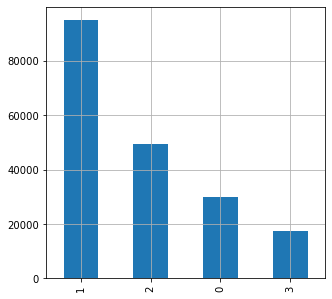

In [57]:
CountStatus = pd.value_counts(KRdata['label'].values, sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(5,5), fontsize=10)